For those who are already familliar with PyTorch, you can skip this. But if you are absolutely new to PyTorch please implement the tutorial at

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

The objective is so you can differentiate the implementation using Numpy, Torch and Torch with Autograd. I'm assuming that no pre reading/studying is done (i.e you have come to class without going through the pytorch links on Spectrum)
 so I'm going to set the first 20 mins of the class for you to actually implement the tutorial above.

But just implementing the tutorial can be boring, especially if you are doing cnp in colab and not coding it again from scratch. So to slightly spice things up, please follow the instructions below.


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import math

1. Add some Gaussian noise to $y=sin(x)$ and plot the data.

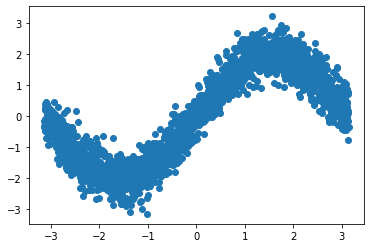

In [ ]:
torch.random.manual_seed(62)

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
noise = torch.from_numpy(np.random.normal(y,0.4))
y= y + noise
plt.scatter(x,y)
plt.show()

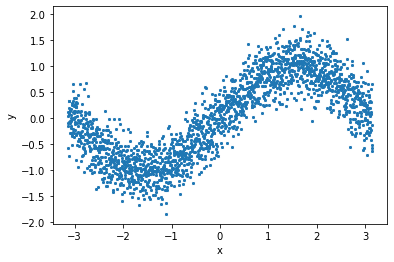

2. Plot the initial prediction when the weights were first initialized. An example is shown below. Your plot is obvious different because of the random initialization 
  

In [ ]:
dtype = torch.float
device = torch.device("cpu")
torch.random.manual_seed(32)
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

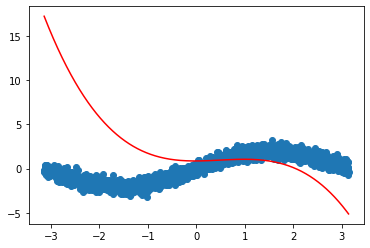

In [ ]:
initial_grad = a + b * x + c * x ** 2 + d * x ** 3
plt.scatter(x,y)
plt.plot(x,initial_grad,"r")
plt.show()

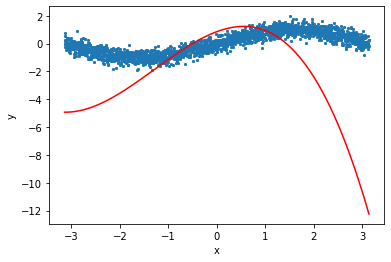

In [ ]:
weight=[]
loss_hist=[]
learning_rate = 1e-6
for i in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    loss_hist.append(loss)
    weight.append(y_pred)
    if i % 100 == 99:
        print(i, loss)
        


    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2585.671922226921
199 1852.4920946655213
299 1362.8047920253648
399 1035.5513760031226
499 816.715200587591
599 670.2835628520478
699 572.233926846227
799 506.53396610049106
899 462.4779272817898
999 432.9129743312903
1099 413.05663795819504
1199 399.70974136880636
1299 390.7307307594872
1399 384.6847398988855
1499 380.60994712963
1599 377.86112779871155
1699 376.0051032533066
1799 374.75048306890653
1899 373.90163006875855
1999 373.3266646265918
Result: y = 0.021577000617980957 + 1.688438057899475 x + -0.004870817065238953 x^2 + -0.1825638711452484 x^3


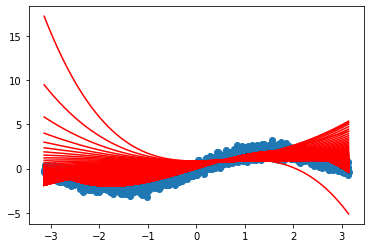

In [ ]:
plt.scatter(x,y)
for i in range(len(weight)):
  plt.plot(x,weight[i],"r")
plt.show()

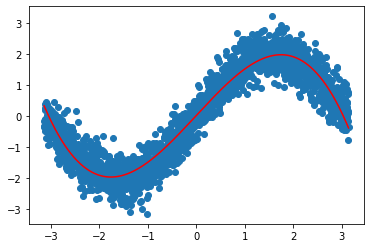

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred,"r")
plt.show()

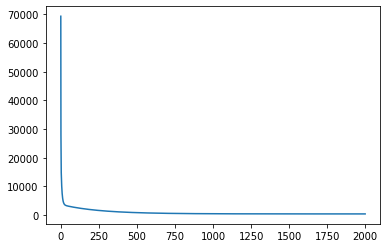

In [ ]:
plt.plot([i for i in range(len(loss_hist))],loss_hist)
plt.show()


3. Print out the result of the final equation. Example shown below

4. Plot also the solutions at different epochs. An sample plot is shown below. I've not labelled the solution curves.

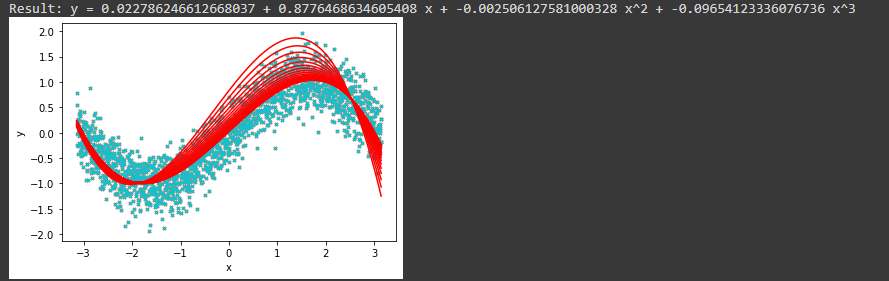

5. Plot the final solution only. Example shown below.

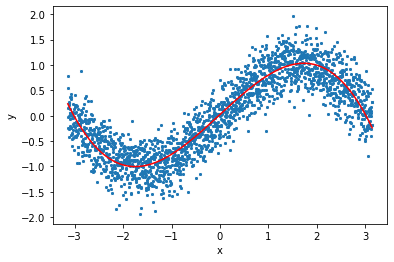

6. Plot the epoch vs loss graph. Example shown below


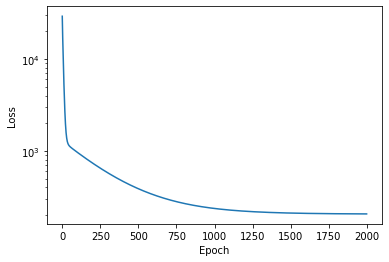

6. What is the purpose of this exercise?